<center><h1><b>Lecture 4</b></h1></center>
<center><h1><b>Monte Carlo Method, Sampling, and Confidence Intervals</b></h1></center>

<center><h4>Time: T2 (09:00 ~ 09:50) and R78 (15:30 ~ 17:20)</h4></center>

<center><h2>Chieh-En Lee<sup>1</sup> (李杰恩) and Chung-Hao Tien<sup>2</sup> (田仲豪)</h2></center>

<center>
<h4>{<a href="mailto:celee@nycu.edu.tw">celee</a><sup>1</sup>, 
<a href="mailto:chtien@nycu.edu.tw">chtien</a><sup>2</sup>}@nycu.edu.tw</h4>
</center>

<center><h3><a href="https://dop.nycu.edu.tw/ch/index.html">Department of Photonics</a>, <a href="https://www.nycu.edu.tw/">NYCU</a></h3></center>

<br />
<center><h5><a href="https://github.com/bruce88617/nycudopcs_advanced">Data Science and Python Programming</a>, 2024 Spring</h5></center>


## Last Time

- Part I: Random Walk
    * Random walks
    * The drunkard's walk
    * Biased random walks
    * Treacherous fields
- Part II: Stochastic Programs
    * Stochastic programs
    * Inferential statistics
    * Distributions
    * Simulation of more practical cases

## **Today**

<ul>
  <li><a href="#tag1">Law of large numbers</a></li>
  <li><a href="#tag2">Monte Carlo method</a></li>
  <li><a href="#tag3">Sampling</a></li>
  <li><a href="#tag4">Confidence intervals</a></li>
</ul>


## **Introduction**

#### Recall the Simulation of Flipping Coin

<img align="center" height=300px width=auto src="./assets/fig1.png">
<br >
<img align="center" height=300px width=auto src="./assets/fig2.png">

- What have we learned in this simulation?

    * As the number of flips increases, __the mean of heads/tails ratio tempts to converge__ and the standard deviation decreases.

    * We already know the truth that the probability of getting a head/tail from a fair coin is exactly 0.5.
    
    * After this simulation, we can confirm that this is truth.

#### Pascal's Problem

- Reputedly, Pascal’s interest in the field that came to know as probability theory began when a friend asked him a question:

    >
    >   Is it profitable to bet that one can get a double 6 within 24 rolls of a pair of dice?
    >

- To solve this problem, we have

    1. The probability of rolling a double 6 is $\frac{1}{36}$.

    2. The probability of not rolling a double 6 on the first roll is $1 - \frac{1}{36} = \frac{35}{36}$.

    3. Therefore the probability of not rolling a double 6 in 24 consecutive times is $(\frac{35}{36})^{24} \approx 0.49$

- Also, we can write a stochastic program to simulate this game.

Run Simulation of Pascal's Game
    Probability of winning = 0.4907


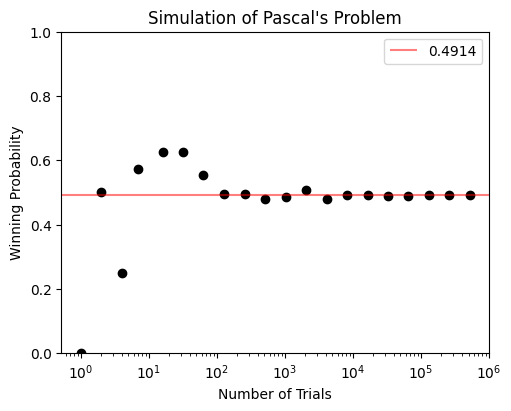

In [2]:
from scripts.testFuncs import test1

test1()

#### $\pi$ Estimation

- Reputedly, Pascal’s interest in the field that came to know as probability theory began when a friend asked him a question:

    >
    >   Is it profitable to bet that one can get a double 6 within 24 rolls of a pair of dice?
    >

- To solve this problem, we have

    1. The probability of rolling a double 6 is $\frac{1}{36}$.

    2. The probability of not rolling a double 6 on the first roll is $1 - \frac{1}{36} = \frac{35}{36}$.

    3. Therefore the probability of not rolling a double 6 in 24 consecutive times is $(\frac{35}{36})^{24} \approx 0.49$

- Also, we can write a stochastic program to simulate this game.

Est. = 3.20000, STD = 1.60000, numData = 1
Est. = 3.26000, STD = 1.08277, numData = 2
Est. = 3.12000, STD = 0.89755, numData = 4
Est. = 3.25143, STD = 0.56392, numData = 7
Est. = 3.12500, STD = 0.39922, numData = 16
Est. = 3.13875, STD = 0.30968, numData = 32
Est. = 3.14095, STD = 0.22528, numData = 63
Est. = 3.15811, STD = 0.13205, numData = 127
Est. = 3.13953, STD = 0.09627, numData = 256
Est. = 3.14352, STD = 0.07860, numData = 512
Est. = 3.13852, STD = 0.05636, numData = 1024
Est. = 3.13898, STD = 0.03417, numData = 2048
Est. = 3.14039, STD = 0.02046, numData = 4095
Est. = 3.14197, STD = 0.01724, numData = 8191
Est. = 3.14110, STD = 0.01164, numData = 16383
Est. = 3.14325, STD = 0.00950, numData = 32768


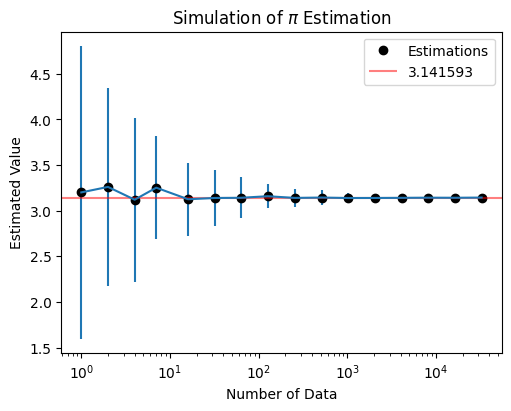

In [1]:
from scripts.testFuncs import test2

test2(numTrials=100, toPrint=True)




<a id="tag1"></a>

## **Law of Large Numbers**



<a id="tag2"></a>

## **Monte Carlo method**



Est. = 0.54000, STD = 0.49840, numData = 1
Est. = 0.54000, STD = 0.32924, numData = 2
Est. = 0.54250, STD = 0.25752, numData = 4
Est. = 0.56286, STD = 0.19673, numData = 7
Est. = 0.57500, STD = 0.12562, numData = 16
Est. = 0.57719, STD = 0.09051, numData = 32
Est. = 0.57762, STD = 0.06184, numData = 63
Est. = 0.57008, STD = 0.04306, numData = 127
Est. = 0.56898, STD = 0.03269, numData = 256
Est. = 0.57016, STD = 0.01923, numData = 512
Est. = 0.56948, STD = 0.01697, numData = 1024
Est. = 0.57116, STD = 0.01139, numData = 2048
Est. = 0.56958, STD = 0.00628, numData = 4095
Est. = 0.57032, STD = 0.00538, numData = 8191
Est. = 0.57121, STD = 0.00376, numData = 16383
Est. = 0.57095, STD = 0.00252, numData = 32768


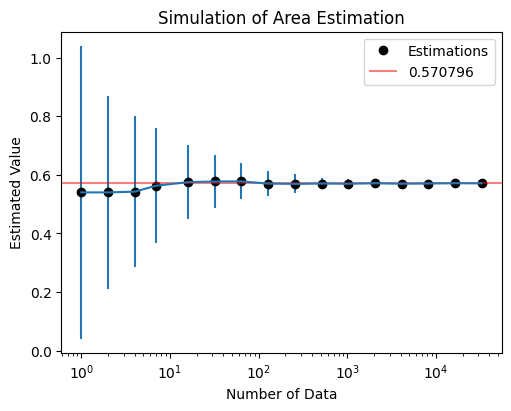

In [1]:
from scripts.testFuncs import test3

test3(numTrials=100, toPrint=True)